Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Data Preprocessing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate Independent and Dependent Variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Inicialize Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the Model
model_dt.fit(X_train, y_train)

# Do preditions on test data
y_pred_dt = model_dt.predict(X_test)

# Calculate model accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia (Árvore de Decisão): {accuracy_dt}")

# View the ranking report
print("Classification Report (Árvore de Decisão):")
print(classification_report(y_test, y_pred_dt))

Acurácia (Árvore de Decisão): 0.7207792207792207
Classification Report (Árvore de Decisão):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



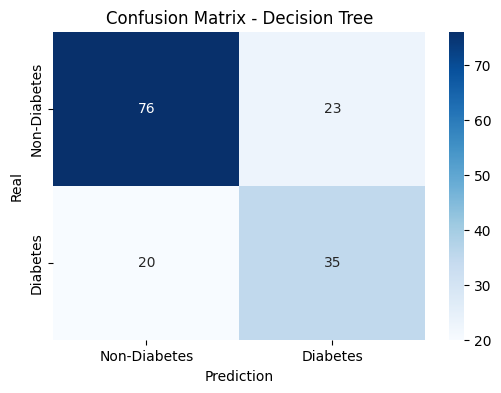

In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.show()

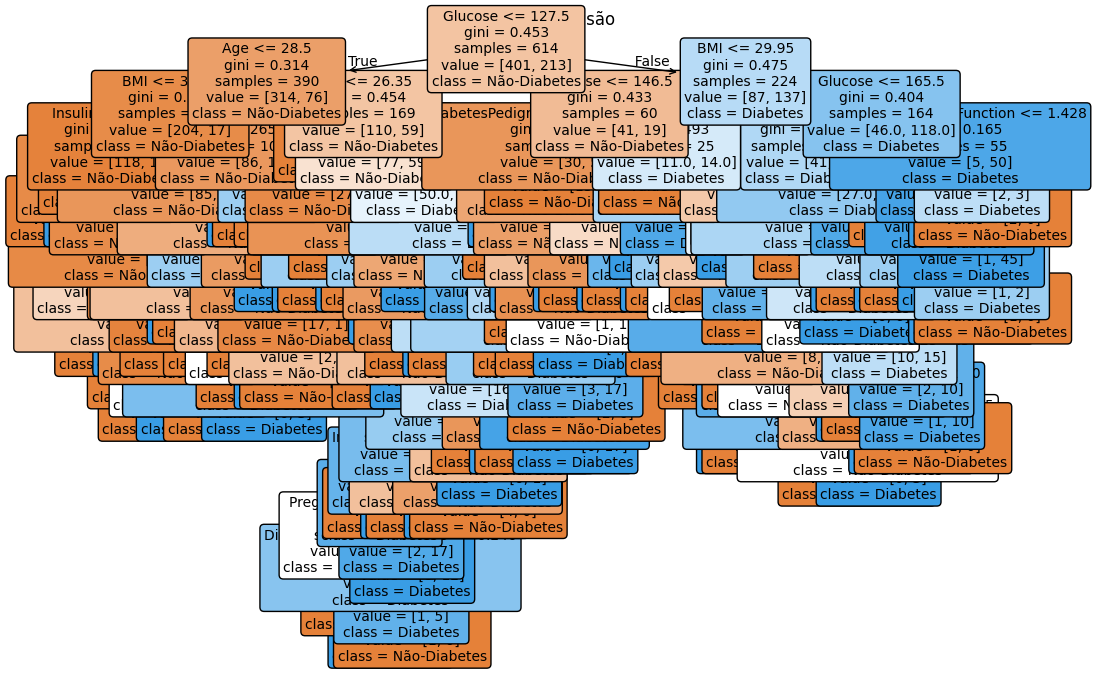

In [ ]:
# Visualize Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=['Não-Diabetes', 'Diabetes'], rounded=True, fontsize=10)
plt.title("Árvore de Decisão")
plt.show()

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Acurácia com GridSearch: 0.7556977209116353
Acurácia (Árvore de Decisão otimizada): 0.7207792207792207
Classification Report (Árvore de Decisão otimizada):
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



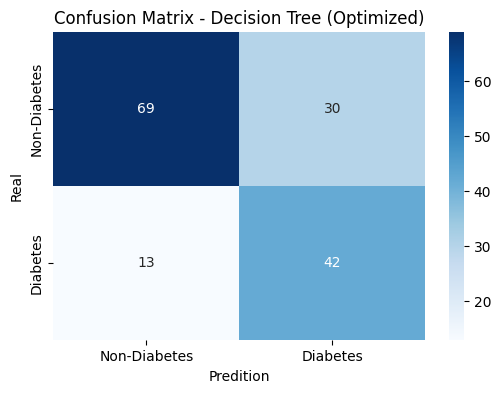

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Set the parameters for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     

model_dt = DecisionTreeClassifier(random_state=42)

# Define GridSearch
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with GridSearch
grid_search.fit(X_train, y_train)

# Results
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print(f"Acurácia com GridSearch: {grid_search.best_score_}")

# Test the better model 
best_model = grid_search.best_estimator_
y_pred_dt_best = best_model.predict(X_test)

# Avaliate the optimized model
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print(f"Acurácia (Árvore de Decisão otimizada): {accuracy_dt_best}")
print("Classification Report (Árvore de Decisão otimizada):")
print(classification_report(y_test, y_pred_dt_best))

# Confusion Matrix 
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Decision Tree (Optimized)')
plt.xlabel('Predition')
plt.ylabel('Real')
plt.show()


Acurácia média com validação cruzada: 0.7110771581359816
Classification Report (Árvore de Decisão otimizada):
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



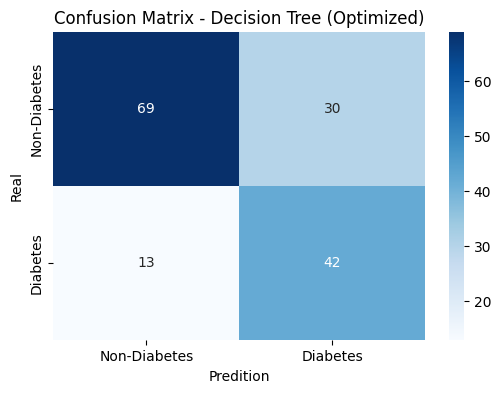

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define the model
model_dt_cv = DecisionTreeClassifier(random_state=42)

# Cross Validation
cv_scores = cross_val_score(model_dt_cv, X, y, cv=5, scoring='accuracy')

# Evaluate average performance
print(f"Acurácia média com validação cruzada: {cv_scores.mean()}")
print("Classification Report (Árvore de Decisão otimizada):")
print(classification_report(y_test, y_pred_dt_best))

# Confusion Matrix
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Decision Tree (Optimized)')
plt.xlabel('Predition')
plt.ylabel('Real')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Preprocessing: replace 0 with NaN in some columns and fill with the median
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate the independent (X) and dependent (y) variables
X = data.drop('Outcome', axis=1)  
y = data['Outcome']  

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store the results
results = []

# Method 1: Base Template
model_base = DecisionTreeClassifier(random_state=42)
model_base.fit(X_train, y_train)  
y_pred_base = model_base.predict(X_test)  

# Classification report for the base model
report_base = classification_report(y_test, y_pred_base, output_dict=True)
accuracy_base = accuracy_score(y_test, y_pred_base)

# Stores base model results
results.append({
    'Modelo': 'Árvore de Decisão (Base)',
    'Acurácia': accuracy_base,
    'Precision (Não-Diabetes)': report_base['0']['precision'],
    'Recall (Não-Diabetes)': report_base['0']['recall'],
    'F1-Score (Não-Diabetes)': report_base['0']['f1-score'],
    'Precision (Diabetes)': report_base['1']['precision'],
    'Recall (Diabetes)': report_base['1']['recall'],
    'F1-Score (Diabetes)': report_base['1']['f1-score']
})

# Method 2: Adjusted Depth
model_adjusted = DecisionTreeClassifier(max_depth=5, random_state=42)  
model_adjusted.fit(X_train, y_train)  
y_pred_adjusted = model_adjusted.predict(X_test)  

# Classification report for the fitted model
report_adjusted = classification_report(y_test, y_pred_adjusted, output_dict=True)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)

# Store fitted model results
results.append({
    'Modelo': 'Árvore de Decisão (Profundidade Ajustada)',
    'Acurácia': accuracy_adjusted,
    'Precision (Não-Diabetes)': report_adjusted['0']['precision'],
    'Recall (Não-Diabetes)': report_adjusted['0']['recall'],
    'F1-Score (Não-Diabetes)': report_adjusted['0']['f1-score'],
    'Precision (Diabetes)': report_adjusted['1']['precision'],
    'Recall (Diabetes)': report_adjusted['1']['recall'],
    'F1-Score (Diabetes)': report_adjusted['1']['f1-score']
})

# Method 3: Cross Validation
cv_results = cross_validate(model_base, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Average cross-validation metrics
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_f1_cv = np.mean(cv_results['test_f1'])

# Store cross-validation results
results.append({
    'Modelo': 'Árvore de Decisão (Validação Cruzada)',
    'Acurácia': mean_accuracy_cv,
    'Precision (Não-Diabetes)': mean_precision_cv,
    'Recall (Não-Diabetes)': mean_recall_cv,
    'F1-Score (Não-Diabetes)': mean_f1_cv,
    'Precision (Diabetes)': mean_precision_cv,
    'Recall (Diabetes)': mean_recall_cv,
    'F1-Score (Diabetes)': mean_f1_cv
})

# Create the DataFrame with the results
results_df = pd.DataFrame(results)

# View the results
print(results_df)


                                      Modelo  Acurácia  \
0                   Árvore de Decisão (Base)  0.720779   
1  Árvore de Decisão (Profundidade Ajustada)  0.727273   
2      Árvore de Decisão (Validação Cruzada)  0.711077   

   Precision (Não-Diabetes)  Recall (Não-Diabetes)  F1-Score (Não-Diabetes)  \
0                  0.791667               0.767677                 0.779487   
1                  0.843373               0.707071                 0.769231   
2                  0.592195               0.593501                 0.590701   

   Precision (Diabetes)  Recall (Diabetes)  F1-Score (Diabetes)  
0              0.603448           0.636364             0.619469  
1              0.591549           0.763636             0.666667  
2              0.592195           0.593501             0.590701  


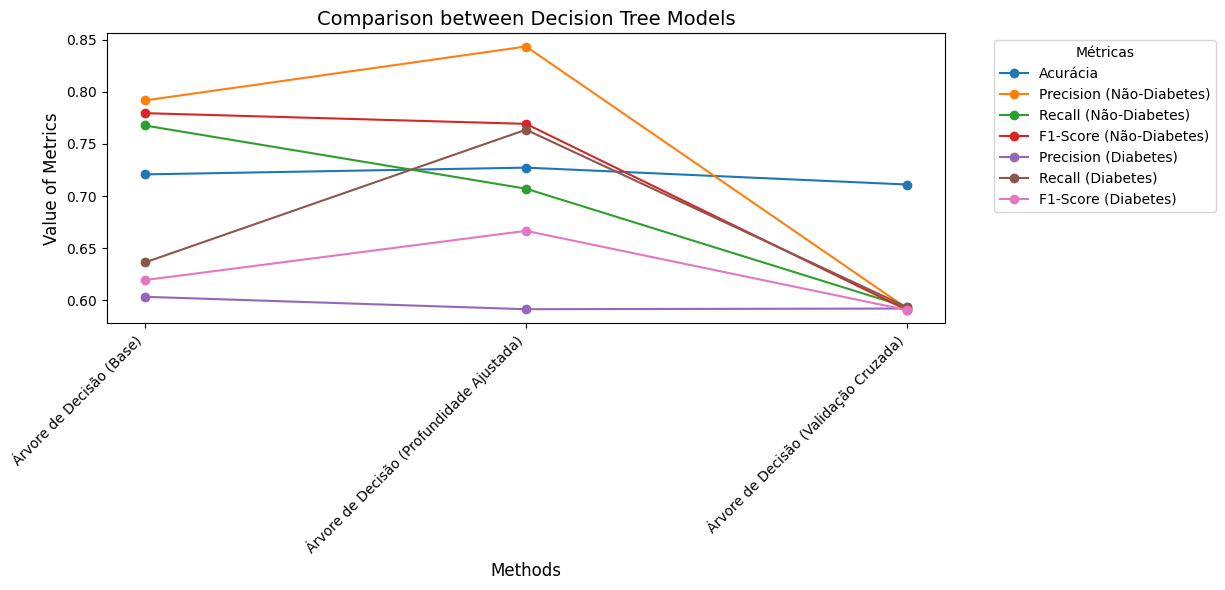

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant metrics for the chart
metrics = ['Acurácia', 'Precision (Não-Diabetes)', 'Recall (Não-Diabetes)', 'F1-Score (Não-Diabetes)', 
           'Precision (Diabetes)', 'Recall (Diabetes)', 'F1-Score (Diabetes)']

# Prepare the data for the chart
method_names = results_df['Modelo']
metrics_values = results_df[metrics].values.T  

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.plot(method_names, metrics_values[i], label=metric, marker='o')

# Add title and labels to axes
plt.title('Comparison between Decision Tree Models', fontsize=14)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Value of Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title="Métricas") 

plt.tight_layout()

plt.show()
